In [4]:
%load_ext autoreload

In [5]:
%autoreload
from tqdm.notebook import tqdm
import numpy as np
from diff3d import DLA_diff3d
from diff2d import DLA_diff2d

import seaborn as sns
from collections import Counter
import itertools
import matplotlib.pyplot as plt

sns.set()
sns.set_context("poster")

ModuleNotFoundError: No module named 'diff3d'

In [495]:
def generate_tree_diff3d(PS):
    x, y, z = [40, 100, 40]
    eta = 1
    dla = DLA_diff3d(seed=[x//2, y - 1, z//2], x = x, y = y, z = z, eta=eta, w = 1, PS = PS)

    while not dla.converged:
        dla.update()

    for t in tqdm(range(150)):
        dla.growth(t + 1)

        while not dla.converged:
            dla.update()
    return dla

In [496]:
def generate_tree_diff2d(PS):
    x, y = [40, 80]
    eta = 1
    dla = DLA_diff2d(seed=[x//2, y - 1], x = x, y = y, eta=eta, w = 1, PS = PS)

    while not dla.converged:
        dla.update()

    for t in tqdm(range(150)):
        dla.growth(t + 1)

        while not dla.converged:
            dla.update()
    return dla

In [497]:
#insert models here

In [498]:
simulations = 10
PSs = [10, 20, 30, 40, 50]

generated_trees = dict()


In [499]:
for PS in PSs:
    generated_trees[PS] = []

In [500]:
for PS in PSs:
    for _ in range(simulations):
        # change model here
        generated_trees[PS].append(generate_tree_diff2d(PS))
        
generated_trees

{10: [<diff2d.DLA_diff2d at 0x7ff83c2b3da0>,
 20: [<diff2d.DLA_diff2d at 0x7ff83c0cf208>,
 30: [<diff2d.DLA_diff2d at 0x7ff83a3197b8>,
 40: [<diff2d.DLA_diff2d at 0x7ff83a3a3a58>,
 50: [<diff2d.DLA_diff2d at 0x7ff83bb6a9b0>,
  <diff2d.DLA_diff2d at 0x7ff83bbec550>]}

In [501]:
# for PS in PSs:
#     plt.figure()
#     branch_orders = []
#     for tree in generated_trees[PS]:
#         branch_orders += tree.tree.get_branch_orders()
#     plt.hist(branch_orders, bins = max(branch_orders))
#     plt.title("{}".format(PS))

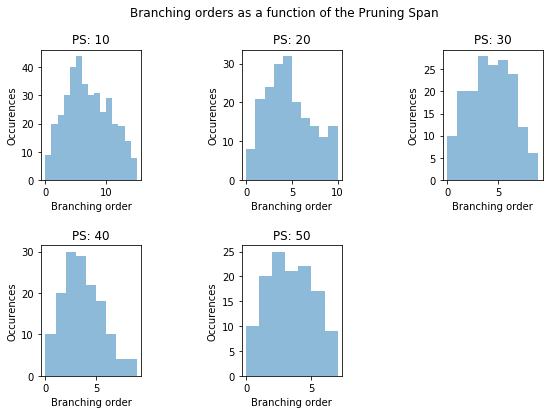

In [615]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))
ax = ax.flatten()
counter  = 0
for PS in PSs:

    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    
    
    c = Counter(branch_orders)
    c = sorted(c.items())
    x, y = zip(*c)
    ax[counter].hist(branch_orders, alpha = 0.5, bins = max(branch_orders))
    ax[counter].set_title("PS: {}".format(PS))
    ax[counter].set_xlabel("Branching order")
    ax[counter].set_ylabel("Occurences")
    counter += 1

fig.delaxes(ax[counter])
fig.subplots_adjust(wspace = 1, hspace = 0.5)
fig.suptitle("Branching orders as a function of the Pruning Span")
plt.ylabel("Occurences")
plt.show()

In [6]:
plt.figure()
for PS in PSs:

    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    
    
    c = Counter(branch_orders)
    c = sorted(c.items())
    x, y = zip(*c)
    plt.plot(x, y, label='PS = {}'.format(PS))
    
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [565]:
means = []
errors = []
for PS in PSs:
    length_ratio = []

    for tree in generated_trees[PS]:
        length_ratio.append(tree.tree.get_lenghts_ratio())
        
    mean = np.mean(length_ratio)
    std = np.std(length_ratio)
    means.append(mean)
    errors.append(std)
    
    print("Length ratio = {} +- {}. For PS = {}".format(mean, std, PS))
    

Length ratio = 0.7800387090783955 +- 0.1394025340179213. For PS = 10
Length ratio = 0.6746154484604048 +- 0.15119845717778513. For PS = 20
Length ratio = 0.49972172403222787 +- 0.15446924951733665. For PS = 30
Length ratio = 0.4066836316794305 +- 0.12053977852375555. For PS = 40
Length ratio = 0.36402796661980724 +- 0.0874157893952332. For PS = 50


In [2]:
fig, ax = plt.subplots()
ax.bar(PSs, means, yerr=errors, width = 5, alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Length ratio')
ax.set_xlabel('Pruning span')
ax.set_xticks(PSs)
ax.yaxis.grid(True)
fig.suptitle("Length ratio as a function of the pruning span")
plt.show()


NameError: name 'plt' is not defined

In [589]:
means = []
errors = []
for PS in PSs:
    asym = []

    for tree in generated_trees[PS]:
        asym.append(tree.tree.get_asymmetry_index())
    
    mean = np.mean(asym)
    std = np.std(asym)
    means.append(mean)
    errors.append(std)
    print("Asymmetry index = {} +- {}. For PS = {}".format(mean, std, PS))
    

Asymmetry index = 0.6944757006027645 +- 0.06687480623746643. For PS = 10
Asymmetry index = 0.6255904280904282 +- 0.1230231298260595. For PS = 20
Asymmetry index = 0.6724404761904762 +- 0.10283538749753758. For PS = 30
Asymmetry index = 0.5507936507936508 +- 0.17380662460436255. For PS = 40
Asymmetry index = 0.6663095238095238 +- 0.1620955196265251. For PS = 50


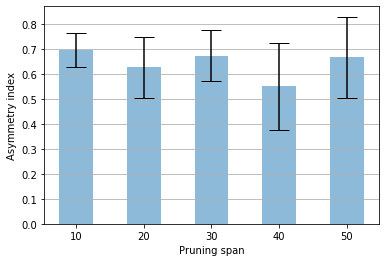

In [590]:
fig, ax = plt.subplots()
ax.bar(PSs, means, yerr=errors, width = 5, alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Asymmetry index')
ax.set_xlabel('Pruning span')
ax.set_xticks(PSs)
ax.yaxis.grid(True)
fig.suptitle("Asymmetry index as a function of the pruning span")
plt.show()

In [586]:
# beware for change in function name, leafs!=terminal segments
means = []
errors = []

for PS in PSs:
    leafs = []

    for tree in generated_trees[PS]:
        leafs.append(tree.tree.get_number_of_terminal_segments())
    
    mean = np.mean(leafs)
    std = np.std(leafs)
    means.append(mean)
    errors.append(std)
    
    print("Terminal leafs = {} +- {}. For PS = {}".format(mean, std, PS))



Terminal leafs = 19.7 +- 1.4177446878757824. For PS = 10
Terminal leafs = 10.3 +- 1.9519221295943134. For PS = 20
Terminal leafs = 9.2 +- 1.6613247725836149. For PS = 30
Terminal leafs = 7.9 +- 1.445683229480096. For PS = 40
Terminal leafs = 6.9 +- 1.445683229480096. For PS = 50


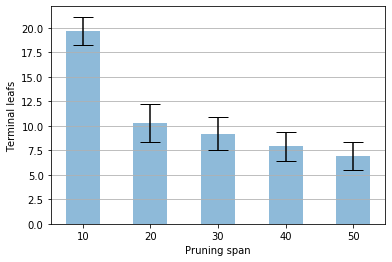

In [588]:
fig, ax = plt.subplots()
ax.bar(PSs, means, yerr=errors, width = 5, alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Terminal leafs')
ax.set_xlabel('Pruning span')
ax.set_xticks(PSs)
ax.yaxis.grid(True)
fig.suptitle("Terminal leafs as a function of the pruning span")
plt.show()